<a href="https://colab.research.google.com/github/MataiasCost/Python/blob/main/Machine%20Learning/Projeto%201%3A%20Classificando%20imagens%20com%20Keras/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importanto os pacotes necessários

In [62]:
# Versão do tensorflow utilizada
# !pip install tensorflow==2.3.0
#Para acessar e utilizar datasets da google para identificação de imagens
import tensorflow
from tensorflow import keras
#Para visualizar as imagens dos datasets
import matplotlib.pyplot as plt
# Para salvar os modelos de NN
from tensorflow.keras.models import load_model
#Para os teste no final do modelo
import random
import numpy as np




## Carregando o dataset

In [2]:
#Acessando dataset
dataset = keras.datasets.fashion_mnist 

In [3]:
# Vinculando o dataset em uma tupla 
((imagens_treino,identificacao_treino),(imagens_teste,identificacao_teste)) = dataset.load_data()

## Visualizando os dados

In [4]:
# Visualizando o tamanho e shape dessa nova tupla
# imagens_treino.shape[1]
print('Temos {0} imagens de treino, descrita por {1} linhas e {bins_y} colunas'.format(len(imagens_treino),
                                                                                                           imagens_treino.shape[1],
                                                                                                           bins_y = imagens_treino.shape[2]))
print('Temos {0} imagens de teste, descrita por {1} linhas e {bins_y} colunas'.format(len(imagens_teste),
                                                                                                           imagens_teste.shape[1],
                                                                                                           bins_y = imagens_teste.shape[2]))


Temos 60000 imagens de treino, descrita por 28 linhas e 28 colunas
Temos 10000 imagens de teste, descrita por 28 linhas e 28 colunas


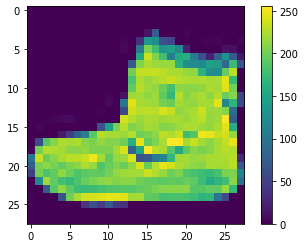

In [5]:
# Visualizando imagens de treino
plt.imshow(imagens_treino[0])
# Visualizando a quantidade de cores que existem na imagem
plt.colorbar() 

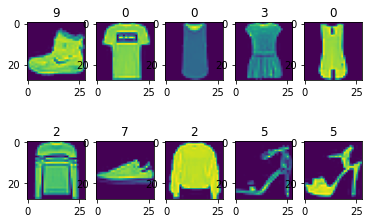

In [116]:
# Lendo o github reponsável pelo dataset : https://github.com/zalandoresearch/fashion-mnist
# É apresentado um label para cada imagens. Essa informação se encontra na variável identificacao_treino, onde:
# 0 	T-shirt/top
# 1 	Trouser
# 2 	Pullover
# 3 	Dress
# 4 	Coat
# 5 	Sandal
# 6 	Shirt
# 7 	Sneaker
# 8 	Bag
# 9 	Ankle boot
# Podemos extratir então o label da seguinte forma:
for idx in range(10):
  plt.subplot(2,5,idx+1)
  plt.imshow(imagens_treino[idx])
  plt.title(identificacao_treino[idx])

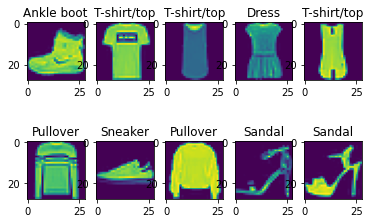

In [7]:
# Podemos criar uma lista que melhore a leitura
labels=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']
# Podemos extrair então o label modificado da seguinte forma:
for idx in range(10):
  plt.subplot(2,5,idx+1)
  plt.imshow(imagens_treino[idx])
  plt.title(labels[identificacao_treino[idx]])

## Normalizando os dados

In [ ]:
imagens_treino = imagens_treino/255.0

## Criando nosso modelo de Deep Learning

In [8]:
# Cada linha dentro do modelo tem um significado e tentando exclarecer melhor qual é esse significado, abaixo se encontra uma breve explicação sobre cada uma das
# linhas
# Primeiro é feita a criação do modelo Sequential do keras (fonte: https://keras.io/guides/sequential_model/)

# Esse modelo precisa de três camas: Formato dos dados (Input), Função de classificação (Processamento) e Formato de saída (output) 
# Para o input utilizamos a função Flatter (https://keras.io/api/layers/reshaping_layers/flatten/), que vai achatar os nossos dados de entrada que estão 
# no formato 28x28 para 784x1
# Para o processamento usamos a classe Dense (https://keras.io/api/layers/core_layers/dense/), utilizando a função relu
# (https://keras.io/api/layers/activation_layers/relu/) como ativação
# Para o output vamos ter 10 informações, contendo a porcentagem de cada label, com base na função softmax (https://keras.io/api/layers/activation_layers/softmax/)

modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation = tensorflow.nn.relu),
    # keras.layers.Dense(128,activation = tensorflow.nn.relu),
    keras.layers.Dense(10,activation = tensorflow.nn.softmax)
])



In [9]:
# Compilando o modelo
# Sendo sincero essa parte eu não entendi muito bem, mas procurando na documentação https://keras.io/api/models/model_training_apis/
# parece que adam é uma função para otimizar o output que temos e loss é a de comparar o que é predito com os labels
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics= ['accuracy'])

In [10]:
historico = modelo.fit(imagens_treino,identificacao_treino,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.5025 - accuracy: 0.8220 - val_loss: 0.4404 - val_accuracy: 0.8382
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3766 - accuracy: 0.8630 - val_loss: 0.3822 - val_accuracy: 0.8619
Epoch 3/10
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3346 - accuracy: 0.8777 - val_loss: 0.3529 - val_accuracy: 0.8720
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3119 - accuracy: 0.8850 - val_loss: 0.3390 - val_accuracy: 0.8789
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2930 - accuracy: 0.8917 - val_loss: 0.3337 - val_accuracy: 0.8782
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2768 - accuracy: 0.8963 - val_loss: 0.3248 - val_accuracy: 0.8850
Epoch 7/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.2633 - accuracy: 0.9007 - val_loss: 0.3322 - val_accura

# Visualizando a acurácia do modelo ao longo das épocas.

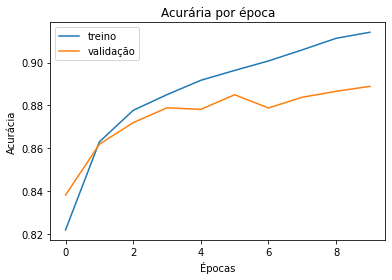

In [11]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurária por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

Como, conforme passam as épocas, tanto a acurácia do treino quanto a do teste estão subindo, isso pode indicar que não ocorre um overfitting, ou seja, o modelo não está supertreinado somente nós dados e não consegue descrever bem os dados de validação.

## Visualizando perda ao longo das épocas

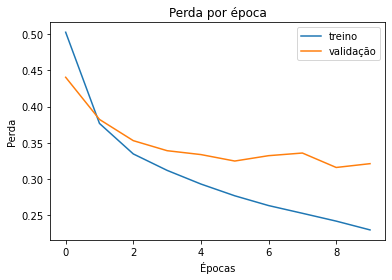

In [12]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

Pelo gráfico de perda, é possível ver que o fit ja se ajustou muito aos dados (quando comparado com a validação), indicando um *overfitting* 

## Salvando esse modelo para futuros testes

In [13]:
modelo.save('modelo_1.h5')

## Criando novo modelo com função *dropout*

O objetivo é ver se retiramos o ovefitting indicado no modelo_1

In [14]:
# Faz as configurações do modelo
modelo = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(256,activation = tensorflow.nn.relu),
    keras.layers.Dropout(0.2),
    # keras.layers.Dense(128,activation = tensorflow.nn.relu),
    keras.layers.Dense(10,activation = tensorflow.nn.softmax)
])
# Compila o modelo
modelo.compile(optimizer = 'adam',
               loss = 'sparse_categorical_crossentropy',
               metrics= ['accuracy'])


# Treina o modelo
historico_segundo_modelo = modelo.fit(imagens_treino,identificacao_treino,batch_size=32,epochs=10,validation_split=0.2)

Epoch 1/10
1500/1500 [==============================] - 12s 7ms/step - loss: 0.5280 - accuracy: 0.8118 - val_loss: 0.4060 - val_accuracy: 0.8545
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3974 - accuracy: 0.8541 - val_loss: 0.3620 - val_accuracy: 0.8710
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3627 - accuracy: 0.8680 - val_loss: 0.3533 - val_accuracy: 0.8700
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3392 - accuracy: 0.8749 - val_loss: 0.3343 - val_accuracy: 0.8778
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3205 - accuracy: 0.8795 - val_loss: 0.3436 - val_accuracy: 0.8778
Epoch 6/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3096 - accuracy: 0.8854 - val_loss: 0.3203 - val_accuracy: 0.8830
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2984 - accuracy: 0.8897 - val_loss: 0.3235 - val_accurac

## Visualizando os graficos de acurácia e perda do segundo modelo

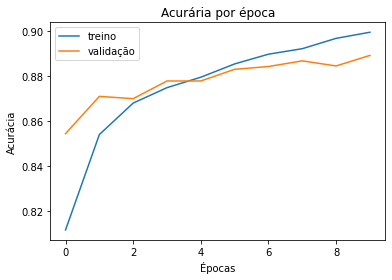

In [15]:
# Acurácia
plt.plot(historico_segundo_modelo.history['accuracy'])
plt.plot(historico_segundo_modelo.history['val_accuracy'])
plt.title('Acurária por época')
plt.xlabel('Épocas')
plt.ylabel('Acurácia')
plt.legend(['treino','validação'])

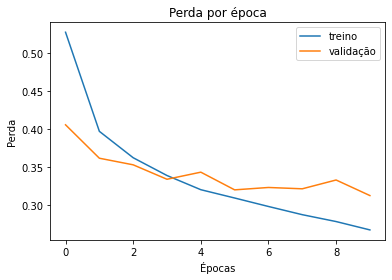

In [16]:
# Perda
plt.plot(historico_segundo_modelo.history['loss'])
plt.plot(historico_segundo_modelo.history['val_loss'])
plt.title('Perda por época')
plt.xlabel('Épocas')
plt.ylabel('Perda')
plt.legend(['treino','validação'])

# Salvando o modelo 2

In [17]:
modelo.save('modelo_2.h5')

# Conclusão

Aparentemente o modelo 2 apresenta uma melhor acurácia na validação do que no treino, além de diminuir o ovefitting dos dados. Vamos então utiliza o modelo 2 para fazer as predições de fato.

## Fazendo predições com o modelo 2
Carregando o modelo

In [20]:
modelo = load_model('modelo_2.h5')

Checando sua perda e acurácia

In [31]:
informacoes = modelo.evaluate(imagens_teste,identificacao_teste)
print('O modelo possuí {:.2f}% de acurácia'.format(informacoes[1]*100))

313/313 [==============================] - 1s 3ms/step - loss: 56.7828 - accuracy: 0.8684
O modelo possuí 86.84% de acurácia


# Fazendo predições com o modelo

In [100]:
identificacao = modelo.predict(imagens_teste)


313/313 [==============================] - 1s 3ms/step


Text(0.5, 1.0, 'Modelo:Pullover')

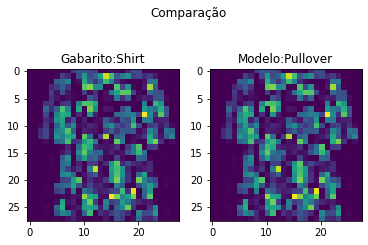

In [113]:
x = random.randint(0,10000)
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle('Comparação')
ax1.imshow(imagens_teste[x])
ax1.set_title('Gabarito:'+str(labels[identificacao_teste[x]]))
ax2.imshow(imagens_teste[x])
ax2.set_title('Modelo:'+str(labels[np.argmax(identificacao[x])]))
# axs[1].title('Gabarito')